In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import minimize_scalar as minisc
from kidcalc import D,cinduct,Qi,kbTeff
import scipy.io
from scipy.optimize import curve_fit

In [3]:
KIDnum = 1
Pread = 96
Tbath = 120
wvlngth = 402

S21data,peakdata = datacalc.get_data(KIDnum,Pread,Tbath,wvlngth)

In [3]:
S21data = np.genfromtxt(S21file,delimiter = ',')[1:,:]
peakdata = scipy.io.loadmat(peakfile)['pulsemodelfo']

C:\Users\Steven\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:208: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [4]:
#Extract relevant data
hw = S21data[:,5]*2*np.pi*.6582*1e-9 #µeV
kbT = S21data[:,1]*86.17 #µeV

t = (np.arange(len(peakdata[0,:]))-500)*1e3
peak = np.clip(peakdata[0,:],1e-3,None)

In [6]:
#Set needed constants
hw0 = hw[0] #data[0,23]*2*np.pi*.6582#WHICH ONE??!
lbd0 = .092 #nm
d = S21data[0,25]
D0 = S21data[0,15]/1.602e-19*1e6 #µeV
ak = 0.02686309
V = S21data[0,14]
t0 = 440.
kbTc = 86.17*S21data[0,21]
tesc = .14
tpb = .28

#For D calculation:
N0 = 1.72e4
kbTD = 37312.
def integrand1(E,D):
            return 1/np.sqrt(E**2-D**2)
Vsc = 1/(integrate.quad(integrand1,D0,kbTD,args = (D0,))[0]*N0)

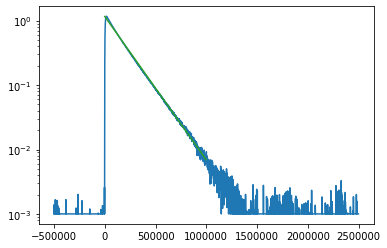

In [7]:
t1 = t[np.round(3*len(t)/5).astype(int):]
peak1 = peak[np.round(3*len(t)/5).astype(int):]
fit = curve_fit(lambda x,a,b: b*np.exp(-x/a), t1, peak1, p0 = (.5e6,peak[500]))[0]

plt.yscale('log')
plt.plot(t,peak)
plt.plot(t1,fit[1]*np.exp(-t1/fit[0]))

t2 = t[np.round(len(t)/6).astype(int):np.round(len(t)/2).astype(int)]
peak2 = peak[np.round(len(t)/6).astype(int):np.round(len(t)/2).astype(int)]

fit2 = curve_fit(lambda x,a,b: b*np.exp(-x/a), t2, peak2, p0 = (.5e6,peak2[0]))[0]
plt.plot(t2,fit2[1]*np.exp(-t2/fit2[0]))

In [8]:
Nqp_0 = V*t0*N0*kbTc**3/(2*D0**2*fit2[0])*.5*(1+tesc/tpb)

In [9]:
kbTeff(Nqp_0,N0,V,Vsc,kbTD,kbTc)

19.55563268911148

In [15]:
_/86.17

0.21966120982558732

## With S21 data, determine at which $T_{bath}$ we have this $Q_i$ 

In [12]:
def kbTeffb(ak,lbd0,d,D0,hw,Qit,N0,Vsc,kbTD):
    def minfunc(kbT,ak,lbd0,d,D0,hw,Qit,N0,Vsc,kbTD):
        D_t = D(kbT,N0,Vsc,kbTD)
        s = cinduct(hw,D_t,kbT)
        return np.abs(Qi(s[0],s[1],ak,lbd0,d,D_t,D0,kbT) - Qit)
    res = minisc(minfunc, args = (ak,lbd0,d,D0,hw,Qit,N0,Vsc,kbTD), 
                 bounds = (0.,D0), method = 'bounded')
    if res.success:
        return res.x

In [13]:
kbTeffb(ak,lbd0,d,D0,hw0,data[0,4],N0,Vsc,kbTD)

17.823156846398337

In [10]:
_/86.17

0.20771774189007944